In [ ]:
!pip install pafy youtube-dl moviepy

     |████████████████████████████████| 1.9 MB 23.0 MB/s 


https://learnopencv.com/introduction-to-video-classification-and-human-activity-recognition/

In [ ]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2949120/45929032 bytes (6.4%)6152192/45929032 bytes (13.4%)9371648/45929032 bytes (20.4%)12648448/45929032 bytes (27.5%)15990784/45929032 bytes (34.8%)19243008/45929032 bytes (41.9%)22519808/45929032 bytes (49.0%)25821184/45929032 bytes (56.2%)29040640/45929032 bytes (63.2%)32366592/45929032 bytes (70.5%)35430400/45929032 bytes (77.1%)38592512/45929032 bytes (84.0%)

In [ ]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
!wget -nc --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
!unrar x UCF50.rar -inul -y

--2021-09-30 18:04:13--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/rar]
Saving to: ‘UCF50.rar’

UCF50.rar           100%[===================>]   3.01G  25.6MB/s    in 2m 1s   

2021-09-30 18:06:14 (25.6 MB/s) - ‘UCF50.rar’ saved [3233554570/3233554570]



In [ ]:
!rm *.rar

In [ ]:
cd /content

/content


In [ ]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir('UCF50')

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
    
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd /content/UCF50

/content/UCF50


In [ ]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

CATEGORIES = ["Biking", "Rowing", "Skijet", "TaiChi"] #10 11, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["JumpingJack"]#15 16#, "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["PlayingGuitar"]#17 18, "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["Rowing", "Skijet"] #10 11
#CATEGORIES = ["Skijet"] #10 11
#CATEGORIES = ["Kayaking"] #12 13 ERROR SO EXECUTE THE NEXT CODE SNIPPET AFTER EXECUTING THIS
#CATEGORIES = ["TaiChi"] # 10, 11
#CATEGORIES = ["Rowing", "Skijet", "TaiChi"]
if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    
    for category in CATEGORIES:
        occur = []
        for i in range(25):
          occur.append(0)
        print(occur)
        occur = np.array(occur)
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          filepath = os.path.join("..", "UCF50", category, filename)
          path = "/content/UCF50/" + category + "/" + filename
          video_id = category
          print(filename)
          video_no = filename[10] + filename[11]
          print(video_no)
          occur[int((video_no)) - 1] = occur[int((video_no)) - 1] + 1
            #video_list = []
        #    print(video_no)
            #for no in video_no:
              #print(filename[14] + filename[15])
              #print(no)

        
        for i in range(10, 25):
          L = []
          for j in range(int(occur[i])):
            #print(len(str(i)))
            #print(j+1)
            if(len(str(i+1)) < 2):
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
            else:
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
          video_id = category
          #print(L)
          try: 
            if not os.path.exists(f'data/{video_id}'): 
              os.makedirs(f'data/{video_id}')
                
              
          except OSError: 
            print ('Error: Creating directory of data')

          final_clip = concatenate_videoclips(L)
          final_clip.to_videofile("/content/UCF50/data/" + video_id + "/" + category + str(int(i)+1) + ".mp4", fps=24, remove_temp=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category Biking
v_Biking_g23_c04.avi
23
v_Biking_g18_c06.avi
18
v_Biking_g20_c01.avi
20
v_Biking_g20_c04.avi
20
v_Biking_g08_c03.avi
08
v_Biking_g16_c03.avi
16
v_Biking_g15_c05.avi
15
v_Biking_g04_c03.avi
04
v_Biking_g06_c02.avi
06
v_Biking_g23_c01.avi
23
v_Biking_g20_c03.avi
20
v_Biking_g19_c04.avi
19
v_Biking_g25_c01.avi
25
v_Biking_g23_c03.avi
23
v_Biking_g04_c02.avi
04
v_Biking_g03_c04.avi
03
v_Biking_g05_c02.avi
05
v_Biking_g08_c02.avi
08
v_Biking_g24_c02.avi
24
v_Biking_g09_c01.avi
09
v_Biking_g18_c04.avi
18
v_Biking_g04_c01.avi
04
v_Biking_g21_c06.avi
21
v_Biking_g24_c08.avi
24
v_Biking_g22_c04.avi
22
v_Biking_g02_c04.avi
02
v_Biking_g12_c04.avi
12
v_Biking_g10_c02.avi
10
v_Biking_g20_c06.avi
20
v_Biking_g15_c02.avi
15
v_Biking_g21_c12.avi
21
v_Biking_g01_c04.avi
01
v_Biking_g21_c08.avi
21
v_Biking_g14_c03.avi
14
v_Biking_g09_c02.avi
09
v_Biking_g08_c05.avi
08
v_Biking_g17_c03.avi
17
v_Biking_

100%|██████████| 761/761 [00:05<00:00, 128.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking12.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking12.mp4


100%|██████████| 677/677 [00:05<00:00, 120.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking13.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking13.mp4


100%|██████████| 844/844 [00:07<00:00, 117.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking14.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking14.mp4


100%|██████████| 475/475 [00:03<00:00, 151.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking15.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking15.mp4


100%|██████████| 962/962 [00:08<00:00, 115.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking16.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking16.mp4


100%|██████████| 822/822 [00:06<00:00, 117.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking17.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking17.mp4


100%|██████████| 978/978 [00:07<00:00, 126.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking18.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking18.mp4


100%|██████████| 927/927 [00:07<00:00, 119.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking19.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking19.mp4


100%|██████████| 484/484 [00:03<00:00, 133.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking20.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking20.mp4


100%|██████████| 2468/2468 [00:19<00:00, 128.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking21.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking21.mp4


100%|██████████| 2111/2111 [00:18<00:00, 116.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking22.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking22.mp4


100%|██████████| 1059/1059 [00:08<00:00, 130.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking23.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking23.mp4


100%|██████████| 1630/1630 [00:11<00:00, 145.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking24.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking24.mp4


100%|██████████| 1296/1296 [00:10<00:00, 125.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Biking/Biking25.mp4
[MoviePy] Writing video /content/UCF50/data/Biking/Biking25.mp4


100%|██████████| 544/544 [00:04<00:00, 130.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Biking/Biking25.mp4 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category Rowing
v_Rowing_g13_c07.avi
13
v_Rowing_g10_c02.avi
10
v_Rowing_g03_c02.avi
03
v_Rowing_g15_c02.avi
15
v_Rowing_g12_c01.avi
12
v_Rowing_g20_c03.avi
20
v_Rowing_g17_c05.avi
17
v_Rowing_g19_c02.avi
19
v_Rowing_g23_c05.avi
23
v_Rowing_g21_c01.avi
21
v_Rowing_g03_c04.avi
03
v_Rowing_g05_c02.avi
05
v_Rowing_g09_c02.avi
09
v_Rowing_g20_c02.avi
20
v_Rowing_g07_c03.avi
07
v_Rowing_g12_c04.avi
12
v_Rowing_g02_c04.avi
02
v_Rowing_g14_c07.avi
14
v_Rowing_g19_c06.avi
19
v_Rowing_g05_c04.avi
05
v_Rowing_g18_c04.avi
18
v_Rowing_g13_c03.avi
13
v_Rowing_g19_c03.avi
19
v_Rowing_g24_c01.avi
24
v_Rowing_g23_c01.avi
23
v_Rowing_g15_c01.avi
15
v_Rowing_g02_c01.avi
02
v_Rowing_g06_c02.avi
06
v_Rowing_g21_c05.avi
21
v_Rowing_g15_c07.avi
15
v_Rowing_g10_c05.avi
10
v_Rowing_g22_c02.avi
22
v_Rowing_g12_c06.avi
12
v_Rowing_g22_c03.av

100%|██████████| 1599/1599 [00:11<00:00, 133.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing12.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing12.mp4


100%|██████████| 3290/3290 [00:25<00:00, 131.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing13.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing13.mp4


100%|██████████| 1127/1127 [00:09<00:00, 118.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing14.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing14.mp4


100%|█████████▉| 2040/2041 [00:15<00:00, 128.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing15.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing15.mp4


100%|██████████| 5531/5531 [00:43<00:00, 128.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing16.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing16.mp4


100%|██████████| 575/575 [00:03<00:00, 152.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing17.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing17.mp4


100%|██████████| 1956/1956 [00:12<00:00, 151.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing18.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing18.mp4


100%|██████████| 1086/1086 [00:07<00:00, 140.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing19.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing19.mp4


100%|██████████| 1672/1672 [00:12<00:00, 137.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing20.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing20.mp4


100%|██████████| 816/816 [00:06<00:00, 122.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing21.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing21.mp4


100%|█████████▉| 816/817 [00:06<00:00, 125.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing22.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing22.mp4


100%|██████████| 573/573 [00:03<00:00, 152.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing23.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing23.mp4


100%|██████████| 1041/1041 [00:07<00:00, 146.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing24.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing24.mp4


100%|██████████| 1056/1056 [00:07<00:00, 134.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Rowing/Rowing25.mp4
[MoviePy] Writing video /content/UCF50/data/Rowing/Rowing25.mp4


100%|██████████| 2231/2231 [00:16<00:00, 131.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Rowing/Rowing25.mp4 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category Skijet
v_Skijet_g15_c01.avi
15
v_Skijet_g14_c04.avi
14
v_Skijet_g17_c04.avi
17
v_Skijet_g13_c01.avi
13
v_Skijet_g04_c03.avi
04
v_Skijet_g25_c03.avi
25
v_Skijet_g19_c01.avi
19
v_Skijet_g10_c03.avi
10
v_Skijet_g11_c03.avi
11
v_Skijet_g12_c02.avi
12
v_Skijet_g12_c01.avi
12
v_Skijet_g10_c01.avi
10
v_Skijet_g06_c01.avi
06
v_Skijet_g24_c03.avi
24
v_Skijet_g04_c04.avi
04
v_Skijet_g23_c03.avi
23
v_Skijet_g25_c04.avi
25
v_Skijet_g09_c02.avi
09
v_Skijet_g06_c02.avi
06
v_Skijet_g22_c02.avi
22
v_Skijet_g14_c03.avi
14
v_Skijet_g25_c02.avi
25
v_Skijet_g01_c04.avi
01
v_Skijet_g24_c01.avi
24
v_Skijet_g04_c01.avi
04
v_Skijet_g10_c02.avi
10
v_Skijet_g13_c02.avi
13
v_Skijet_g09_c01.avi
09
v_Skijet_g02_c04.avi
02
v_Skijet_g23_c01.avi
23
v_Skijet_g03_c03.avi
03
v_Skijet_g07_c04.avi
07
v_Skijet_g09_c04.avi
09
v_Skijet_g17_c02.av

100%|██████████| 673/673 [00:05<00:00, 118.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet12.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet12.mp4


100%|██████████| 673/673 [00:04<00:00, 143.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet13.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet13.mp4


100%|██████████| 673/673 [00:05<00:00, 125.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet14.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet14.mp4


100%|█████████▉| 672/673 [00:05<00:00, 122.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet15.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet15.mp4


100%|██████████| 800/800 [00:06<00:00, 125.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet16.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet16.mp4


100%|█████████▉| 672/673 [00:04<00:00, 151.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet17.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet17.mp4


100%|██████████| 792/792 [00:07<00:00, 113.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet18.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet18.mp4


100%|██████████| 683/683 [00:06<00:00, 105.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet19.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet19.mp4


100%|██████████| 805/805 [00:06<00:00, 123.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet20.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet20.mp4


100%|██████████| 671/671 [00:05<00:00, 129.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet21.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet21.mp4


100%|██████████| 600/600 [00:04<00:00, 122.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet22.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet22.mp4


100%|██████████| 671/671 [00:05<00:00, 117.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet23.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet23.mp4


100%|██████████| 805/805 [00:07<00:00, 112.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet24.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet24.mp4


100%|██████████| 672/672 [00:04<00:00, 150.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Skijet/Skijet25.mp4
[MoviePy] Writing video /content/UCF50/data/Skijet/Skijet25.mp4


100%|██████████| 998/998 [00:07<00:00, 127.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Skijet/Skijet25.mp4 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category TaiChi
v_TaiChi_g21_c01.avi
21
v_TaiChi_g05_c02.avi
05
v_TaiChi_g14_c04.avi
14
v_TaiChi_g04_c03.avi
04
v_TaiChi_g18_c02.avi
18
v_TaiChi_g19_c03.avi
19
v_TaiChi_g14_c01.avi
14
v_TaiChi_g03_c03.avi
03
v_TaiChi_g15_c04.avi
15
v_TaiChi_g01_c02.avi
01
v_TaiChi_g03_c04.avi
03
v_TaiChi_g02_c04.avi
02
v_TaiChi_g18_c01.avi
18
v_TaiChi_g15_c03.avi
15
v_TaiChi_g02_c03.avi
02
v_TaiChi_g15_c01.avi
15
v_TaiChi_g13_c02.avi
13
v_TaiChi_g17_c04.avi
17
v_TaiChi_g03_c02.avi
03
v_TaiChi_g13_c03.avi
13
v_TaiChi_g23_c02.avi
23
v_TaiChi_g14_c03.avi
14
v_TaiChi_g05_c04.avi
05
v_TaiChi_g24_c04.avi
24
v_TaiChi_g06_c02.avi
06
v_TaiChi_g08_c03.avi
08
v_TaiChi_g04_c01.avi
04
v_TaiChi_g12_c02.avi
12
v_TaiChi_g10_c03.avi
10
v_TaiChi_g09_c03.avi
09
v_TaiChi_g06_c04.avi
06
v_TaiChi_g08_c01.avi
08
v_TaiChi_g08_c02.avi
08
v_TaiChi_g12_c03.av

100%|██████████| 683/683 [00:02<00:00, 278.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi12.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi12.mp4


100%|██████████| 688/688 [00:04<00:00, 162.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi13.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi13.mp4


100%|██████████| 686/686 [00:02<00:00, 245.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi14.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi14.mp4


100%|██████████| 674/674 [00:02<00:00, 244.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi15.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi15.mp4


100%|█████████▉| 672/673 [00:02<00:00, 257.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi16.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi16.mp4


100%|██████████| 715/715 [00:02<00:00, 262.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi17.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi17.mp4


100%|██████████| 694/694 [00:04<00:00, 172.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi18.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi18.mp4


100%|██████████| 703/703 [00:04<00:00, 163.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi19.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi19.mp4


100%|██████████| 678/678 [00:03<00:00, 173.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi20.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi20.mp4


100%|██████████| 667/667 [00:02<00:00, 229.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi21.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi21.mp4


100%|██████████| 668/668 [00:05<00:00, 123.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi22.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi22.mp4


100%|██████████| 833/833 [00:05<00:00, 166.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi23.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi23.mp4


100%|██████████| 938/938 [00:05<00:00, 157.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi24.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi24.mp4


100%|██████████| 836/836 [00:04<00:00, 200.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/TaiChi/TaiChi25.mp4
[MoviePy] Writing video /content/UCF50/data/TaiChi/TaiChi25.mp4


100%|██████████| 708/708 [00:03<00:00, 197.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/TaiChi/TaiChi25.mp4 



In [ ]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

#CATEGORIES = ["Biking"] #10 11, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["JumpingJack"]#15 16#, "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
CATEGORIES = ["PlayingGuitar"]#17 18, "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["Rowing", "Skijet"] #10 11
#CATEGORIES = ["Skijet"] #10 11
#CATEGORIES = ["Kayaking"] #12 13 ERROR SO EXECUTE THE NEXT CODE SNIPPET AFTER EXECUTING THIS
#CATEGORIES = ["TaiChi"] # 10, 11
#CATEGORIES = ["Rowing", "Skijet", "TaiChi"]
if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    
    for category in CATEGORIES:
        occur = []
        for i in range(25):
          occur.append(0)
        print(occur)
        occur = np.array(occur)
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          filepath = os.path.join("..", "UCF50", category, filename)
          path = "/content/UCF50/" + category + "/" + filename
          video_id = category
          print(filename)
          

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category PlayingGuitar
v_PlayingGuitar_g11_c03.avi
v_PlayingGuitar_g17_c03.avi
v_PlayingGuitar_g14_c05.avi
v_PlayingGuitar_g01_c04.avi
v_PlayingGuitar_g12_c03.avi
v_PlayingGuitar_g03_c03.avi
v_PlayingGuitar_g15_c06.avi
v_PlayingGuitar_g24_c04.avi
v_PlayingGuitar_g03_c06.avi
v_PlayingGuitar_g04_c07.avi
v_PlayingGuitar_g14_c01.avi
v_PlayingGuitar_g22_c03.avi
v_PlayingGuitar_g20_c05.avi
v_PlayingGuitar_g13_c05.avi
v_PlayingGuitar_g25_c05.avi
v_PlayingGuitar_g24_c02.avi
v_PlayingGuitar_g05_c03.avi
v_PlayingGuitar_g04_c04.avi
v_PlayingGuitar_g04_c06.avi
v_PlayingGuitar_g22_c04.avi
v_PlayingGuitar_g12_c06.avi
v_PlayingGuitar_g25_c03.avi
v_PlayingGuitar_g18_c01.avi
v_PlayingGuitar_g25_c06.avi
v_PlayingGuitar_g16_c03.avi
v_PlayingGuitar_g18_c06.avi
v_PlayingGuitar_g11_c01.avi
v_PlayingGuitar_g18_c02.avi
v_PlayingGuitar_g15_c02.avi
v_PlayingGuitar_g02_c02.avi
v_PlayingGuitar_g23_c05.avi
v_PlayingGuitar_g23_c0

In [ ]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

#CATEGORIES = ["Biking"] #10 11, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["JumpingJack"]#15 16#, "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
CATEGORIES = ["PlayingGuitar"]#17 18, "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["Rowing", "Skijet"] #10 11
#CATEGORIES = ["Skijet"] #10 11
#CATEGORIES = ["Kayaking"] #12 13 ERROR SO EXECUTE THE NEXT CODE SNIPPET AFTER EXECUTING THIS
#CATEGORIES = ["TaiChi"] # 10, 11
#CATEGORIES = ["Rowing", "Skijet", "TaiChi"]
if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    
    for category in CATEGORIES:
        occur = []
        for i in range(25):
          occur.append(0)
        print(occur)
        occur = np.array(occur)
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          filepath = os.path.join("..", "UCF50", category, filename)
          path = "/content/UCF50/" + category + "/" + filename
          video_id = category
          print(filename)
          

In [ ]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

#CATEGORIES = ["Biking"] #10 11, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
CATEGORIES = ["JumpingJack"]#15 16#, "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["PlayingGuitar"]#17 18, "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["Rowing", "Skijet"] #10 11
#CATEGORIES = ["Skijet"] #10 11
#CATEGORIES = ["Kayaking"] #12 13 ERROR SO EXECUTE THE NEXT CODE SNIPPET AFTER EXECUTING THIS
#CATEGORIES = ["TaiChi"] # 10, 11
#CATEGORIES = ["Rowing", "Skijet", "TaiChi"]
if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    
    for category in CATEGORIES:
        occur = []
        for i in range(25):
          occur.append(0)
        print(occur)
        occur = np.array(occur)
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          filepath = os.path.join("..", "UCF50", category, filename)
          path = "/content/UCF50/" + category + "/" + filename
          video_id = category
          print(filename)
          video_no = filename[15] + filename[16]
          print(video_no)
          occur[int((video_no)) - 1] = occur[int((video_no)) - 1] + 1
            #video_list = []
        #    print(video_no)
            #for no in video_no:
              #print(filename[14] + filename[15])
              #print(no)

        
        for i in range(10, 25):
          L = []
          for j in range(int(occur[i])):
            #print(len(str(i)))
            #print(j+1)
            if(len(str(i+1)) < 2):
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
            else:
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
          video_id = category
          #print(L)
          try: 
            if not os.path.exists(f'data/{video_id}'): 
              os.makedirs(f'data/{video_id}')
                
              
          except OSError: 
            print ('Error: Creating directory of data')

          final_clip = concatenate_videoclips(L)
          final_clip.to_videofile("/content/UCF50/data/" + video_id + "/" + category + str(int(i)+1) + ".mp4", fps=24, remove_temp=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category JumpingJack
v_JumpingJack_g08_c02.avi
08
v_JumpingJack_g19_c06.avi
19
v_JumpingJack_g24_c02.avi
24
v_JumpingJack_g17_c01.avi
17
v_JumpingJack_g02_c04.avi
02
v_JumpingJack_g16_c03.avi
16
v_JumpingJack_g11_c04.avi
11
v_JumpingJack_g10_c06.avi
10
v_JumpingJack_g19_c01.avi
19
v_JumpingJack_g04_c04.avi
04
v_JumpingJack_g06_c06.avi
06
v_JumpingJack_g21_c04.avi
21
v_JumpingJack_g23_c03.avi
23
v_JumpingJack_g05_c06.avi
05
v_JumpingJack_g01_c07.avi
01
v_JumpingJack_g15_c04.avi
15
v_JumpingJack_g03_c02.avi
03
v_JumpingJack_g15_c02.avi
15
v_JumpingJack_g04_c02.avi
04
v_JumpingJack_g25_c05.avi
25
v_JumpingJack_g18_c04.avi
18
v_JumpingJack_g06_c03.avi
06
v_JumpingJack_g07_c04.avi
07
v_JumpingJack_g24_c03.avi
24
v_JumpingJack_g20_c02.avi
20
v_JumpingJack_g16_c01.avi
16
v_JumpingJack_g10_c03.avi
10
v_JumpingJack_g14_c01.avi
14
v_JumpingJack_g11_c02.avi
11
v_JumpingJack_g15_c03.avi
15
v_JumpingJack_g03_c01.

100%|█████████▉| 258/259 [00:01<00:00, 150.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack12.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack12.mp4


100%|██████████| 307/307 [00:01<00:00, 212.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack13.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack13.mp4


100%|██████████| 546/546 [00:02<00:00, 209.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack14.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack14.mp4


100%|██████████| 220/220 [00:01<00:00, 164.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack15.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack15.mp4


100%|██████████| 254/254 [00:00<00:00, 300.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack16.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack16.mp4


100%|██████████| 223/223 [00:01<00:00, 217.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack17.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack17.mp4


100%|█████████▉| 306/307 [00:02<00:00, 142.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack18.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack18.mp4


100%|██████████| 283/283 [00:02<00:00, 131.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack19.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack19.mp4


100%|██████████| 455/455 [00:03<00:00, 130.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack20.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack20.mp4


100%|██████████| 376/376 [00:01<00:00, 189.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack21.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack21.mp4


100%|██████████| 326/326 [00:01<00:00, 166.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack22.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack22.mp4


100%|██████████| 233/233 [00:01<00:00, 191.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack23.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack23.mp4


100%|██████████| 275/275 [00:01<00:00, 164.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack24.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack24.mp4


100%|██████████| 292/292 [00:02<00:00, 141.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/JumpingJack/JumpingJack25.mp4
[MoviePy] Writing video /content/UCF50/data/JumpingJack/JumpingJack25.mp4


100%|██████████| 489/489 [00:02<00:00, 209.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/JumpingJack/JumpingJack25.mp4 



In [ ]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

#CATEGORIES = ["Biking"] #10 11, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["JumpingJack"]#15 16#, "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["PlayingGuitar"]#17 18, "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["Rowing", "Skijet"] #10 11
#CATEGORIES = ["Skijet"] #10 11
CATEGORIES = ["Kayaking"] #12 13 ERROR SO EXECUTE THE NEXT CODE SNIPPET AFTER EXECUTING THIS
#CATEGORIES = ["TaiChi"] # 10, 11
#CATEGORIES = ["Rowing", "Skijet", "TaiChi"]
if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    
    for category in CATEGORIES:
        occur = []
        for i in range(25):
          occur.append(0)
        print(occur)
        occur = np.array(occur)
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          filepath = os.path.join("..", "UCF50", category, filename)
          path = "/content/UCF50/" + category + "/" + filename
          video_id = category
          print(filename)
          video_no = filename[12] + filename[13]
          print(video_no)
          occur[int((video_no)) - 1] = occur[int((video_no)) - 1] + 1
            #video_list = []
        #    print(video_no)
            #for no in video_no:
              #print(filename[14] + filename[15])
              #print(no)

        
        for i in range(10, 25):
          L = []
          for j in range(int(occur[i])):
            #print(len(str(i)))
            #print(j+1)
            if(len(str(i+1)) < 2):
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
            else:
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
          video_id = category
          #print(L)
          try: 
            if not os.path.exists(f'data/{video_id}'): 
              os.makedirs(f'data/{video_id}')
                
              
          except OSError: 
            print ('Error: Creating directory of data')

          final_clip = concatenate_videoclips(L)
          final_clip.to_videofile("/content/UCF50/data/" + video_id + "/" + category + str(int(i)+1) + ".mp4", fps=24, remove_temp=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category Kayaking
v_Kayaking_g19_c01.avi
19
v_Kayaking_g07_c01.avi
07
v_Kayaking_g09_c06.avi
09
v_Kayaking_g03_c02.avi
03
v_Kayaking_g05_c01.avi
05
v_Kayaking_g05_c03.avi
05
v_Kayaking_g01_c02.avi
01
v_Kayaking_g15_c10.avi
15
v_Kayaking_g06_c07.avi
06
v_Kayaking_g16_c05.avi
16
v_Kayaking_g18_c05.avi
18
v_Kayaking_g11_c02.avi
11
v_Kayaking_g06_c08.avi
06
v_Kayaking_g22_c02.avi
22
v_Kayaking_g05_c04.avi
05
v_Kayaking_g04_c02.avi
04
v_Kayaking_g18_c04.avi
18
v_Kayaking_g03_c04.avi
03
v_Kayaking_g22_c04.avi
22
v_Kayaking_g01_c04.avi
01
v_Kayaking_g21_c02.avi
21
v_Kayaking_g08_c03.avi
08
v_Kayaking_g14_c03.avi
14
v_Kayaking_g11_c06.avi
11
v_Kayaking_g17_c02.avi
17
v_Kayaking_g13_c04.avi
13
v_Kayaking_g06_c03.avi
06
v_Kayaking_g24_c03.avi
24
v_Kayaking_g15_c09.avi
15
v_Kayaking_g12_c01.avi
12
v_Kayaking_g06_c06.avi
06
v_Kayaking_g22_c07.avi
22
v_Kayaking_g21_c08.avi
21
v_Kayaking_g22_c05.avi
22
v_Kayaking_

100%|██████████| 1069/1069 [00:09<00:00, 107.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking12.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking12.mp4


100%|██████████| 1451/1451 [00:09<00:00, 148.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking13.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking13.mp4


100%|██████████| 1568/1568 [00:11<00:00, 133.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking14.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking14.mp4


100%|██████████| 582/582 [00:04<00:00, 137.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking15.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking15.mp4


100%|██████████| 1638/1638 [00:13<00:00, 121.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking16.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking16.mp4


100%|██████████| 2164/2164 [00:16<00:00, 134.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking17.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking17.mp4


100%|██████████| 959/959 [00:07<00:00, 121.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking18.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking18.mp4


100%|██████████| 1244/1244 [00:11<00:00, 111.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking19.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking19.mp4


100%|██████████| 838/838 [00:07<00:00, 117.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking20.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking20.mp4


100%|██████████| 2375/2375 [00:18<00:00, 125.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking21.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking21.mp4


100%|██████████| 1339/1339 [00:12<00:00, 110.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking22.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking22.mp4


100%|██████████| 1460/1460 [00:13<00:00, 110.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking23.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking23.mp4


100%|██████████| 1008/1008 [00:08<00:00, 121.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking24.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking24.mp4


100%|██████████| 1118/1118 [00:10<00:00, 108.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/Kayaking/Kayaking25.mp4
[MoviePy] Writing video /content/UCF50/data/Kayaking/Kayaking25.mp4


100%|██████████| 1310/1310 [00:08<00:00, 147.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/Kayaking/Kayaking25.mp4 



In [ ]:
#CODE for finding number of clips of one video and joining to make one consolidate video
import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips

#CATEGORIES = ["Biking"] #10 11, "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["JumpingJack"]#15 16#, "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
CATEGORIES = ["PlayingGuitar"]#17 18, "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]
#CATEGORIES = ["Rowing", "Skijet"] #10 11
#CATEGORIES = ["Skijet"] #10 11
#CATEGORIES = ["Kayaking"] #12 13 ERROR SO EXECUTE THE NEXT CODE SNIPPET AFTER EXECUTING THIS
#CATEGORIES = ["TaiChi"] # 10, 11
#CATEGORIES = ["Rowing", "Skijet", "TaiChi"]
if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []
    
    for category in CATEGORIES:
        occur = []
        for i in range(25):
          occur.append(0)
        print(occur)
        occur = np.array(occur)
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "UCF50", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []
        #print((filenames[0][10]) + (filenames[0][11]))
        #occur[int((filenames[0][10]) + (filenames[0][11]))] = occur[int((filenames[0][10]) + (filenames[0][11]))] + 1

        for filename in filenames:
          if filename != ".ipynb_checkpoints":
            filepath = os.path.join("..", "UCF50", category, filename)
            path = "/content/UCF50/" + category + "/" + filename
            video_id = category
            print(filename)
            video_no = filename[17] + filename[18]
            print(video_no)
            occur[int((video_no)) - 1] = occur[int((video_no)) - 1] + 1
              #video_list = []
          #    print(video_no)
              #for no in video_no:
                #print(filename[14] + filename[15])
                #print(no)

        
        for i in range(10, 25):
          L = []
          for j in range(int(occur[i])):
            #print(len(str(i)))
            #print(j+1)
            if(len(str(i+1)) < 2):
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(0) + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
            else:
              if(len(str(j + 1)) < 2):
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(0) + str(int(j)+1) + ".avi")
                L.append(video)
              else:
                video = VideoFileClip("/content/UCF50/"+ category + "/v_"+ category + "_g" + str(int(i)+1) + "_c" + str(int(j)+1) + ".avi")
                L.append(video)
          video_id = category
          #print(L)
          try: 
            if not os.path.exists(f'data/{video_id}'): 
              os.makedirs(f'data/{video_id}')
                
              
          except OSError: 
            print ('Error: Creating directory of data')

          final_clip = concatenate_videoclips(L)
          final_clip.to_videofile("/content/UCF50/data/" + video_id + "/" + category + str(int(i)+1) + ".mp4", fps=24, remove_temp=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Processing category PlayingGuitar
v_PlayingGuitar_g20_c02.avi
20
v_PlayingGuitar_g04_c01.avi
04
v_PlayingGuitar_g03_c06.avi
03
v_PlayingGuitar_g12_c01.avi
12
v_PlayingGuitar_g16_c05.avi
16
v_PlayingGuitar_g25_c01.avi
25
v_PlayingGuitar_g19_c02.avi
19
v_PlayingGuitar_g09_c03.avi
09
v_PlayingGuitar_g04_c07.avi
04
v_PlayingGuitar_g19_c01.avi
19
v_PlayingGuitar_g15_c03.avi
15
v_PlayingGuitar_g21_c06.avi
21
v_PlayingGuitar_g08_c06.avi
08
v_PlayingGuitar_g15_c07.avi
15
v_PlayingGuitar_g14_c05.avi
14
v_PlayingGuitar_g06_c07.avi
06
v_PlayingGuitar_g07_c06.avi
07
v_PlayingGuitar_g04_c04.avi
04
v_PlayingGuitar_g10_c05.avi
10
v_PlayingGuitar_g17_c03.avi
17
v_PlayingGuitar_g05_c03.avi
05
v_PlayingGuitar_g21_c02.avi
21
v_PlayingGuitar_g17_c07.avi
17
v_PlayingGuitar_g17_c01.avi
17
v_PlayingGuitar_g03_c07.avi
03
v_PlayingGuitar_g13_c04.avi
13
v_PlayingGuitar_g25_c06.avi
25
v_PlayingGuitar_g19_c06.avi
19
v_PlayingGuitar_g16_c0

100%|█████████▉| 1680/1681 [00:09<00:00, 174.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar11.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar12.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar12.mp4


100%|█████████▉| 1680/1681 [00:08<00:00, 188.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar12.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar13.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar13.mp4


100%|█████████▉| 1680/1681 [00:10<00:00, 163.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar13.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar14.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar14.mp4


100%|█████████▉| 1728/1729 [00:08<00:00, 192.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar14.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar15.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar15.mp4


100%|█████████▉| 1680/1681 [00:09<00:00, 169.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar15.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar16.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar16.mp4


100%|█████████▉| 1680/1681 [00:09<00:00, 169.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar16.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar17.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar17.mp4


100%|█████████▉| 1680/1681 [00:08<00:00, 208.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar17.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar18.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar18.mp4


100%|█████████▉| 1680/1681 [00:08<00:00, 196.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar18.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar19.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar19.mp4


100%|█████████▉| 1680/1681 [00:08<00:00, 208.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar19.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar20.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar20.mp4


100%|█████████▉| 1680/1681 [00:09<00:00, 186.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar20.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar21.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar21.mp4


100%|█████████▉| 1440/1441 [00:07<00:00, 183.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar21.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar22.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar22.mp4


100%|█████████▉| 1200/1201 [00:06<00:00, 198.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar22.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar23.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar23.mp4


100%|█████████▉| 1680/1681 [00:10<00:00, 160.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar23.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar24.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar24.mp4


100%|█████████▉| 960/961 [00:06<00:00, 147.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar24.mp4 

[MoviePy] >>>> Building video /content/UCF50/data/PlayingGuitar/PlayingGuitar25.mp4
[MoviePy] Writing video /content/UCF50/data/PlayingGuitar/PlayingGuitar25.mp4


100%|█████████▉| 1680/1681 [00:08<00:00, 188.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/UCF50/data/PlayingGuitar/PlayingGuitar25.mp4 



In [ ]:
image_height, image_width = 64, 64
max_images_per_class = 3000

dataset_directory = "/content/UCF50/data"
classes_list = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]

model_output_size = len(classes_list)

In [ ]:
%cd /content

/content


In [ ]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
    
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)

    # Iterating through Video Frames
    while True:

        # Reading a frame from the video file 
        success, frame = video_reader.read() 

        # If Video frame was not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # returning the frames list 
    return frames_list

In [ ]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for file_name in files_list:

            # Construct the complete video path
            #video_file_path = os.path.join(dataset_directory, class_name, file_name)
            video_file_path = "/content/UCF50/data" + class_name + filename
            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)

            # Appending the frames to a temporary list.
            temp_features.extend(frames)
          
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [ ]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))
        print(files_list)
        for file_name in files_list:
          print(file_name)
          #video_file_path = os.path.join(dataset_directory, class_name, file_name)
          video_file_path = "/content/UCF50/data" + class_name + file_name
          print(video_file_path)
        # Iterating through all the files present in the files list
                #for file_name in files_list:

            # Construct the complete video path
            #video_file_path = os.path.join(dataset_directory, class_name, file_name)
            #video_file_path = "/content/UCF50/data" + class_name + filename
            #print(video_file_path)
            # Calling the frame_extraction method for every video file path
          frames = frames_extraction(video_file_path)

            # Appending the frames to a temporary list.
          temp_features.extend(frames)
            #print(temp_features)
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))
        
        # Adding Fixed number of labels to the labels list
        #labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    #labels = np.array(labels)  

    #return features, labels

In [ ]:
import cv2
temp_features = [] 
features = []
labels = []

# Iterating through all the classes mentioned in the classes list
for class_index, class_name in enumerate(classes_list):
    print(f'Extracting Data of Class: {class_name}')
    files_list = os.listdir(os.path.join(dataset_directory, class_name))
    #print(files_list)
    for file_name in files_list:
      print(file_name)
      video_file_path = "/content/UCF50/data" + class_name + file_name
      print(video_file_path)
      frames_list = []
    
    # Reading the Video File Using the VideoCapture
      cap = cv2.VideoCapture(video_file_path)

      # Iterating through Video Frames
      while cap.isOpened():

          # Reading a frame from the video file 
          success, frame = cap.read() 

          # If Video frame was not successfully read then break the loop
          if success == False:
              break
          frames_list.append(frame)

frames_list

Extracting Data of Class: Biking
Biking22.mp4
/content/UCF50/dataBikingBiking22.mp4
Biking14.mp4
/content/UCF50/dataBikingBiking14.mp4
Biking23.mp4
/content/UCF50/dataBikingBiking23.mp4
Biking25.mp4
/content/UCF50/dataBikingBiking25.mp4
Biking12.mp4
/content/UCF50/dataBikingBiking12.mp4
Biking24.mp4
/content/UCF50/dataBikingBiking24.mp4
Biking11.mp4
/content/UCF50/dataBikingBiking11.mp4
Biking13.mp4
/content/UCF50/dataBikingBiking13.mp4
Biking16.mp4
/content/UCF50/dataBikingBiking16.mp4
Biking20.mp4
/content/UCF50/dataBikingBiking20.mp4
Biking21.mp4
/content/UCF50/dataBikingBiking21.mp4
Biking19.mp4
/content/UCF50/dataBikingBiking19.mp4
Biking18.mp4
/content/UCF50/dataBikingBiking18.mp4
Biking17.mp4
/content/UCF50/dataBikingBiking17.mp4
Biking15.mp4
/content/UCF50/dataBikingBiking15.mp4
Extracting Data of Class: JumpingJack
JumpingJack12.mp4
/content/UCF50/dataJumpingJackJumpingJack12.mp4
JumpingJack18.mp4
/content/UCF50/dataJumpingJackJumpingJack18.mp4
JumpingJack17.mp4
/content/UCF50

[]

In [ ]:
import cv2
temp_features = [] 
features = []
labels = []

# Iterating through all the classes mentioned in the classes list
for class_index, class_name in enumerate(classes_list):
    print(f'Extracting Data of Class: {class_name}')
    files_list = os.listdir(os.path.join(dataset_directory, class_name))
    #print(files_list)
    for file_name in files_list:
      print(file_name)
      video_file_path = '/content/UCF50/data/' +  class_name + '/' + file_name
      print(video_file_path)
      
    
    # Reading the Video File Using the VideoCapture
      frames_list = []
      cap = cv2.VideoCapture(video_file_path)
      i=0
      while(cap.isOpened()):
          ret, frame = cap.read()
          if ret == False:
              break
          #print(frame)
          resized_frame = cv2.resize(frame, (image_height, image_width))
              
              # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
          normalized_frame = resized_frame / 255
          frames_list.append(normalized_frame)
          #cv2.imwrite('kang'+str(i)+'.jpg',frame)
          i+=1
      cap.release()
      cv2.destroyAllWindows()

      print(frames_list)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2

# Opens the Video file
frames_list = []
cap = cv2.VideoCapture('/content/UCF50/data/Biking/Biking11.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    #print(frame)
    resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
    normalized_frame = resized_frame / 255
    frames_list.append(normalized_frame)
    #cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=1

cap.release()
cv2.destroyAllWindows()
frames_list

[array([[[0.37647059, 0.50588235, 0.46666667],
         [0.18039216, 0.30980392, 0.27058824],
         [0.12941176, 0.25882353, 0.21960784],
         ...,
         [0.47058824, 0.50588235, 0.52941176],
         [0.41568627, 0.45098039, 0.4745098 ],
         [0.30588235, 0.34117647, 0.36470588]],
 
        [[0.74901961, 0.8745098 , 0.83921569],
         [0.19607843, 0.32156863, 0.28627451],
         [0.12941176, 0.25882353, 0.21960784],
         ...,
         [0.47058824, 0.50588235, 0.52941176],
         [0.41568627, 0.45098039, 0.4745098 ],
         [0.30588235, 0.34117647, 0.36470588]],
 
        [[0.83137255, 0.9372549 , 0.92156863],
         [0.80392157, 0.90980392, 0.89411765],
         [0.16862745, 0.2745098 , 0.25882353],
         ...,
         [0.43921569, 0.47058824, 0.50588235],
         [0.40784314, 0.43921569, 0.4745098 ],
         [0.34509804, 0.37647059, 0.41176471]],
 
        ...,
 
        [[0.25882353, 0.3372549 , 0.36470588],
         [0.25882353, 0.3372549 , 0.36470

In [ ]:
temp_features = [] 
features = []
labels = []

# Iterating through all the classes mentioned in the classes list
for class_index, class_name in enumerate(classes_list):
    print(f'Extracting Data of Class: {class_name}')
    
    # Getting the list of video files present in the specific class name directory
    files_list = os.listdir(os.path.join(dataset_directory, class_name))
    print(files_list)
    for file_name in files_list:
      print(file_name)
      #video_file_path = os.path.join(dataset_directory, class_name, file_name)
      video_file_path = "/content/UCF50/data" + class_name + file_name
      print(video_file_path)
      frames_list = []
    
    # Reading the Video File Using the VideoCapture
      video_reader = cv2.VideoCapture(video_file_path)

      # Iterating through Video Frames
      while video_reader.isOpened():

          # Reading a frame from the video file 
          success, frame = video_reader.read() 

          # If Video frame was not successfully read then break the loop
          if not success:
              break
          frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
          # Resize the Frame to fixed Dimensions
          #resized_frame = cv2.resize(frame, (image_height, image_width))
          
          # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
          #normalized_frame = resized_frame / 255
          
          # Appending the normalized frame into the frames list
          #frames_list.append(normalized_frame)
          frames_list.append(frame)
      # Closing the VideoCapture object and releasing all resources. 
      video_reader.release()

    # Iterating through all the files present in the files list
            #for file_name in files_list:

        # Construct the complete video path
        #video_file_path = os.path.join(dataset_directory, class_name, file_name)
        #video_file_path = "/content/UCF50/data" + class_name + filename
        #print(video_file_path)
        # Calling the frame_extraction method for every video file path
      #frames = frames_extraction(video_file_path)

        # Appending the frames to a temporary list.
      temp_features.append(frames_list)
      print(temp_features)
    features.append(temp_features)
    #labels.extend(class_index)
    
    # Adding randomly selected frames to the features list
    #features.extend(random.sample(temp_features, max_images_per_class))
    #features
    # Adding Fixed number of labels to the labels list
    #labels.extend([class_index] * max_images_per_class)
    
    # Emptying the temp_features list so it can be reused to store all frames of the next class.
    temp_features.clear()

# Converting the features and labels lists to numpy arrays
features = np.asarray(features)
#labels = np.array(labels)  


Extracting Data of Class: Biking
['Biking22.mp4', 'Biking14.mp4', 'Biking23.mp4', 'Biking25.mp4', 'Biking12.mp4', 'Biking24.mp4', 'Biking11.mp4', 'Biking13.mp4', 'Biking16.mp4', 'Biking20.mp4', 'Biking21.mp4', 'Biking19.mp4', 'Biking18.mp4', 'Biking17.mp4', 'Biking15.mp4']
Biking22.mp4
/content/UCF50/dataBikingBiking22.mp4
[[]]
Biking14.mp4
/content/UCF50/dataBikingBiking14.mp4
[[], []]
Biking23.mp4
/content/UCF50/dataBikingBiking23.mp4
[[], [], []]
Biking25.mp4
/content/UCF50/dataBikingBiking25.mp4
[[], [], [], []]
Biking12.mp4
/content/UCF50/dataBikingBiking12.mp4
[[], [], [], [], []]
Biking24.mp4
/content/UCF50/dataBikingBiking24.mp4
[[], [], [], [], [], []]
Biking11.mp4
/content/UCF50/dataBikingBiking11.mp4
[[], [], [], [], [], [], []]
Biking13.mp4
/content/UCF50/dataBikingBiking13.mp4
[[], [], [], [], [], [], [], []]
Biking16.mp4
/content/UCF50/dataBikingBiking16.mp4
[[], [], [], [], [], [], [], [], []]
Biking20.mp4
/content/UCF50/dataBikingBiking20.mp4
[[], [], [], [], [], [], []

In [ ]:
image_height, image_width = 64, 64
max_images_per_class = 2000

dataset_directory = "/content/UCF50/data"
classes_list = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]

model_output_size = len(classes_list)

In [ ]:
%cd /content/UCF50/data
!ls

/content/UCF50/data
Biking	JumpingJack  Kayaking  PlayingGuitar  Rowing  Skijet  TaiChi


In [ ]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
    
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)

    # Iterating through Video Frames
    while True:

        # Reading a frame from the video file 
        success, frame = video_reader.read() 

        # If Video frame was not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # returning the frames list 
    return frames_list

In [ ]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for file_name in files_list:

            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)
            
            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)
            

            # Appending the frames to a temporary list.
            temp_features.extend(frames)
        
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
        
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [ ]:
features, labels = create_dataset()
#create_dataset()

Extracting Data of Class: Biking
Extracting Data of Class: JumpingJack
Extracting Data of Class: Kayaking
Extracting Data of Class: PlayingGuitar
Extracting Data of Class: Rowing
Extracting Data of Class: Skijet
Extracting Data of Class: TaiChi


In [ ]:
print(labels)

[0 0 0 ... 6 6 6]


In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [ ]:
print(features_train.shape)
print(labels_train.shape)

(11200, 64, 64, 3)
(11200, 7)


In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from keras.preprocessing import image
import numpy as np
from skimage.transform import resize

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(features_train)
print(X.shape)
test_image = preprocess_input(features_test)
print(test_image.shape)

(11200, 64, 64, 3)
(2800, 64, 64, 3)


In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
X = base_model.predict(X)
print(X)
test_image = base_model.predict(test_image)
print(test_image)

[[[[0.        0.        0.        ... 0.        0.8156333 0.       ]
   [0.        0.        0.        ... 0.        4.29006   0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]]


 [[[0.        0.        0.        ... 0.        1.2001579 0.       ]
   [0.        0.        0.        ... 0.        4.5018983 0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]]


 [[[0.        0.        0.        ... 0.        1.1996889 0.       ]
   [0.        0.        0.        ... 0.        4.5641036 0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]]


 ...


 [[[0.        0.        0.        ... 0.        1.4754237 0.       ]
   [0.        0.        0.        ... 0.        4.7218432 0.       ]]

  [[0. 

In [ ]:
print(X.shape)
print(test_image.shape)

(11200, 2, 2, 512)
(2800, 2, 2, 512)


In [ ]:
X = X.reshape(11200, 2*2*512)
#X = X.reshape(25600, 2*2*512)
#X_train = X_train.reshape(208, 224*224*3)
test_image = test_image.reshape(2800, 2*2*512)
#test_image = test_image.reshape(186, 224*224*3)
print(X.shape)
print(test_image.shape)

(11200, 2048)
(2800, 2048)


In [ ]:
train = X/X.max()
test_image = test_image/test_image.max()

In [ ]:
model = Sequential()
model.add(InputLayer((2*2*512,)))    # input layer
#model.add(InputLayer((224*224*3,)))
model.add(Dense(units=1024, activation='sigmoid'))   # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=512, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
model.add(Dense(units=256, activation='sigmoid'))    # hidden layer
model.add(Dropout(0.5))      # adding dropout
#model.add(Dense(3, activation='softmax'))  
model.add(Dense(7, activation='sigmoid'))  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train, labels_train , epochs=100, validation_data=(test_image, labels_test))

Epoch 1/100
350/350 [==============================] - 3s 7ms/step - loss: 2.0028 - accuracy: 0.1412 - val_loss: 1.9466 - val_accuracy: 0.1468
Epoch 2/100
350/350 [==============================] - 2s 6ms/step - loss: 1.9488 - accuracy: 0.1425 - val_loss: 1.9469 - val_accuracy: 0.1471
Epoch 3/100
350/350 [==============================] - 2s 6ms/step - loss: 1.9478 - accuracy: 0.1406 - val_loss: 1.9463 - val_accuracy: 0.1300
Epoch 4/100
350/350 [==============================] - 2s 6ms/step - loss: 1.9478 - accuracy: 0.1429 - val_loss: 1.9468 - val_accuracy: 0.1468
Epoch 5/100
350/350 [==============================] - 2s 6ms/step - loss: 1.9469 - accuracy: 0.1402 - val_loss: 1.9461 - val_accuracy: 0.1368
Epoch 6/100
350/350 [==============================] - 2s 6ms/step - loss: 1.9464 - accuracy: 0.1421 - val_loss: 1.9466 - val_accuracy: 0.1368
Epoch 7/100
350/350 [==============================] - 2s 6ms/step - loss: 1.9463 - accuracy: 0.1449 - val_loss: 1.9472 - val_accuracy: 0.1300

In [ ]:
predictions = model.predict(test_image)
print(predictions.shape)
print(predictions)
#print(test_y)

(2800, 7)
[[0.49199027 0.5037501  0.504598   ... 0.4964409  0.49636716 0.50117487]
 [0.49199027 0.5037501  0.504598   ... 0.4964409  0.49636716 0.50117487]
 [0.49199027 0.5037501  0.504598   ... 0.4964409  0.49636716 0.50117487]
 ...
 [0.49199027 0.5037501  0.504598   ... 0.4964409  0.49636716 0.50117487]
 [0.49199027 0.5037501  0.504598   ... 0.4964409  0.49636716 0.50117487]
 [0.49199027 0.5037501  0.504598   ... 0.4964409  0.49636716 0.50117487]]


In [ ]:
scores = model.evaluate(test_image, labels_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

88/88 [==============================] - 0s 3ms/step - loss: 1.9470 - accuracy: 0.1300
accuracy: 13.00%


In [ ]:
# Let's create a function that will construct our model
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)              

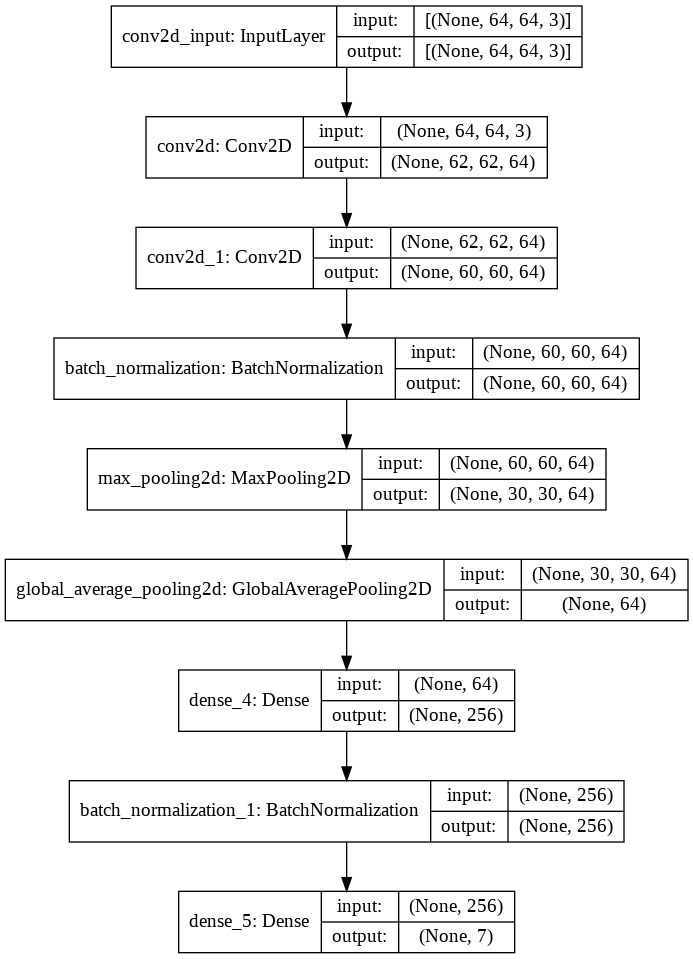

In [ ]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/100
2240/2240 [==============================] - 33s 14ms/step - loss: 1.6984 - accuracy: 0.3286 - val_loss: 1198.1766 - val_accuracy: 0.1460
Epoch 2/100
2240/2240 [==============================] - 28s 12ms/step - loss: 1.5246 - accuracy: 0.4161 - val_loss: 142.6748 - val_accuracy: 0.1513
Epoch 3/100
2240/2240 [==============================] - 23s 10ms/step - loss: 1.4738 - accuracy: 0.4333 - val_loss: 1837.0157 - val_accuracy: 0.1460
Epoch 4/100
2240/2240 [==============================] - 28s 12ms/step - loss: 1.3346 - accuracy: 0.4971 - val_loss: 1360.4283 - val_accuracy: 0.1460
Epoch 5/100
2240/2240 [==============================] - 22s 10ms/step - loss: 1.2298 - accuracy: 0.5376 - val_loss: 1204.6522 - val_accuracy: 0.1513
Epoch 6/100
2240/2240 [==============================] - 23s 10ms/step - loss: 1.2999 - accuracy: 0.5135 - val_loss: 1780.8945 - val_accuracy: 0.1460
Epoch 7/100
2240/2240 [==============================] - 22s 10ms/step - loss: 1.4552 - accuracy: 0.4

In [ ]:
model_evaluation_history = model.evaluate(features_test, labels_test)

88/88 [==============================] - 1s 12ms/step - loss: 1.9469 - accuracy: 0.1300


In [ ]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Saving your Model
model.save(model_name)

In [ ]:
#loaded_model = tf.keras.models.load_model('/content/UCF50/data/Model___Date_Time_2021_09_28__18_24_35___Loss_391.5096435546875___Accuracy_0.15571428835391998.h5')
loaded_model = tf.keras.models.load_model('/content/UCF50/data/Model___Date_Time_2021_09_28__18_06_27___Loss_58.231475830078125___Accuracy_0.15714286267757416.h5')

In [ ]:
loaded_model.layers[0].input_shape

(None, 64, 64, 3)

In [ ]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               16640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)              

In [ ]:
predictions = loaded_model.predict(test_image)
print(predictions.shape)
print(predictions)


(700, 7)
[[0.0000000e+00 9.8318750e-01 0.0000000e+00 ... 4.8026005e-30
  1.4338518e-03 0.0000000e+00]
 [0.0000000e+00 9.8331392e-01 0.0000000e+00 ... 4.4726533e-30
  1.4394510e-03 0.0000000e+00]
 [0.0000000e+00 9.8293853e-01 0.0000000e+00 ... 4.9126963e-30
  1.3785989e-03 0.0000000e+00]
 ...
 [0.0000000e+00 9.8325288e-01 0.0000000e+00 ... 4.4245897e-30
  1.5491864e-03 0.0000000e+00]
 [0.0000000e+00 9.8311806e-01 0.0000000e+00 ... 4.6150845e-30
  1.4480662e-03 0.0000000e+00]
 [0.0000000e+00 9.8319119e-01 0.0000000e+00 ... 4.4240420e-30
  1.5039452e-03 0.0000000e+00]]


[[0. 0. 0. 0. 0. 1. 0.]]


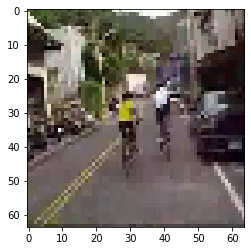

In [ ]:
IMG_SIZE = 64

image_path="/content/UCF50/data/images/kang0.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
print(result)

In [ ]:
%cd /content/UCF50/data/images

/content/UCF50/data/images


In [ ]:
import cv2

# Opens the Video file
frames_list = []
cap = cv2.VideoCapture('/content/UCF50/data/Biking/Biking11.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    #print(frame)
    resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
    normalized_frame = resized_frame / 255
    frames_list.append(normalized_frame)
    cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=1

cap.release()
cv2.destroyAllWindows()
frames_list

[array([[[0.37647059, 0.50588235, 0.46666667],
         [0.18039216, 0.30980392, 0.27058824],
         [0.12941176, 0.25882353, 0.21960784],
         ...,
         [0.47058824, 0.50588235, 0.52941176],
         [0.41568627, 0.45098039, 0.4745098 ],
         [0.30588235, 0.34117647, 0.36470588]],
 
        [[0.74901961, 0.8745098 , 0.83921569],
         [0.19607843, 0.32156863, 0.28627451],
         [0.12941176, 0.25882353, 0.21960784],
         ...,
         [0.47058824, 0.50588235, 0.52941176],
         [0.41568627, 0.45098039, 0.4745098 ],
         [0.30588235, 0.34117647, 0.36470588]],
 
        [[0.83137255, 0.9372549 , 0.92156863],
         [0.80392157, 0.90980392, 0.89411765],
         [0.16862745, 0.2745098 , 0.25882353],
         ...,
         [0.43921569, 0.47058824, 0.50588235],
         [0.40784314, 0.43921569, 0.4745098 ],
         [0.34509804, 0.37647059, 0.41176471]],
 
        ...,
 
        [[0.25882353, 0.3372549 , 0.36470588],
         [0.25882353, 0.3372549 , 0.36470

In [ ]:
predict = model.predict(test_image)
print(predict)

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()
  #plt.show()

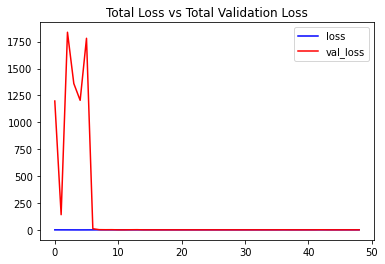

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

In [ ]:
print(model_training_history.history['loss'])

[1.6984056234359741, 1.524567723274231, 1.4738328456878662, 1.3345789909362793, 1.2298346757888794, 1.299869418144226, 1.4551985263824463, 1.9501971006393433, 1.9485007524490356, 1.9483082294464111, 1.9481656551361084, 1.947418212890625, 1.947292685508728, 1.947239637374878, 1.9472140073776245, 1.9471782445907593, 1.9470467567443848, 1.9471054077148438, 1.9469242095947266, 1.947110652923584, 1.9470504522323608, 1.946747899055481, 1.947297215461731, 1.946877360343933, 1.9468728303909302, 1.9469443559646606, 1.9468278884887695, 1.9470572471618652, 1.9470083713531494, 1.9470677375793457, 1.9470546245574951, 1.9469538927078247, 1.947090983390808, 1.946986436843872, 1.9468289613723755, 1.9470659494400024, 1.9470535516738892, 1.9470430612564087, 1.9466681480407715, 1.9470206499099731, 1.9468865394592285, 1.9468204975128174, 1.9471869468688965, 1.9470301866531372, 1.9469722509384155, 1.946895956993103, 1.9470901489257812, 1.946934700012207, 1.947061538696289]


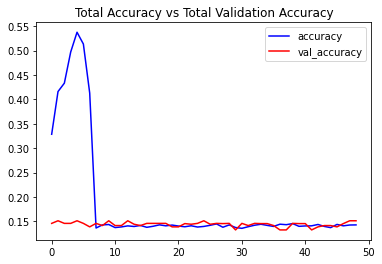

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
def download_youtube_videos(youtube_video_url, output_directory):
    # Creating a Video object which includes useful information regarding the youtube video.
    video = pafy.new(youtube_video_url)

    # Getting the best available quality object for the youtube video.
    video_best = video.getbest()

    # Constructing the Output File Path
    output_file_path = f'{output_directory}/{video.title}.mp4'

    # Downloading the youtube video at the best available quality.
    video_best.download(filepath = output_file_path, quiet = True)

    # Returning Video Title
    return video.title

In [ ]:
def predict_on_live_video(video_file_path, output_file_path, window_size):

    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))

    while True: 

        # Reading The Frame
        status, frame = video_reader.read() 

        if not status:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)

        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:

            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)

            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)

            # Accessing The Class Name using predicted label.
            predicted_class_name = classes_list[predicted_label]
          
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Writing The Frame
        video_writer.write(frame)


        # cv2.imshow('Predicted Frames', frame)

        # key_pressed = cv2.waitKey(10)

        # if key_pressed == ord('q'):
        #     break

    # cv2.destroyAllWindows()

    
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()

In [ ]:
# Creating The Output directories if it does not exist
output_directory = 'Youtube_Videos'
os.makedirs(output_directory, exist_ok = True)

# Downloading a YouTube Video
video_title = download_youtube_videos('https://www.youtube.com/watch?v=8u0qjmHIOcE', output_directory)

# Getting the YouTube Video's path you just downloaded
input_video_file_path = f'{output_directory}/{video_title}.mp4'

In [ ]:
# Setting sthe Window Size which will be used by the Rolling Average Proces
window_size = 1

# Constructing The Output YouTube Video Path
output_video_file_path = f'{output_directory}/{video_title} -Output-WSize {window_size}.mp4'

# Calling the predict_on_live_video method to start the Prediction.
predict_on_live_video(input_video_file_path, output_video_file_path, window_size)

# Play Video File in the Notebook
VideoFileClip(output_video_file_path).ipython_display(width = 700)

100%|██████████| 866/866 [00:01<00:00, 655.94it/s]


In [ ]:
def make_average_predictions(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [ ]:
# Downloading The YouTube Video
#video_title = download_youtube_videos('https://www.youtube.com/watch?v=ceRjxW4MpOY', output_directory)

# Constructing The Input YouTube Video Path
#input_video_file_path = f'{output_directory}/{video_title}.mp4'
input_video_file_path = '/content/UCF50/data/Biking/Biking11.mp4'

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Downloading The YouTube Video
video_title = download_youtube_videos('https://www.youtube.com/watch?v=ayI-e3cJM-0', output_directory)

# Constructing The Input YouTube Video Path
input_video_file_path = f'{output_directory}/{video_title}.mp4'

# Calling The Make Average Method To Start The Process
make_average_predictions(input_video_file_path, 50)

# Play Video File in the Notebook
VideoFileClip(input_video_file_path).ipython_display(width = 700)


CLASS NAME: TaiChi   AVERAGED PROBABILITY: 9e+01
CLASS NAME: Swing   AVERAGED PROBABILITY: 1e+01
CLASS NAME: WalkingWithDog   AVERAGED PROBABILITY: 0.17
CLASS NAME: HorseRace   AVERAGED PROBABILITY: 0.065


100%|██████████| 1650/1650 [00:29<00:00, 55.99it/s]
